# Feature Engineering on the Cleaned Final Data Set

In [278]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the cleaned final dataset

In [2]:
tmc_finaldata = pd.read_csv("tmc_final_data.csv")

In [6]:
tmc_finaldata.head()

,DAY_DT,LOC_IDNT,DBSKU,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,UNIT_SALES_PRICE,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE,DEPARTMENT,CLASS,SUBCLASS,SUBCLASS_NAME,DSUBCLASS
0,2015-09-26,1218,466896.0,0,16.80,1.0,1.3000,15.5000,16.80,COLUMBIA,SC,Lifestyle Center,29229.0,3050.0,10.0,3.0,31.0,Sub Class 2,1031.0
1,2015-08-02,1218,412445.0,0,29.99,1.0,12.9900,17.0000,29.99,COLUMBIA,SC,Lifestyle Center,29229.0,3050.0,10.0,2.0,21.0,Sub Class 2,1021.0
2,2015-10-21,1218,491738.0,1,44.00,1.0,28.2500,15.7500,44.00,COLUMBIA,SC,Lifestyle Center,29229.0,3050.0,10.0,5.0,50.0,Sub Class 3,1050.0
3,2015-08-02,1218,414979.0,0,24.00,1.0,6.9936,17.0064,24.00,COLUMBIA,SC,Lifestyle Center,29229.0,3050.0,10.0,3.0,32.0,Sub Class 1,1032.0
4,2015-07-26,1218,458372.0,1,48.00,1.0,30.0000,18.0000,48.00,COLUMBIA,SC,Lifestyle Center,29229.0,3050.0,10.0,3.0,32.0,Sub Class 1,1032.0


### Dropping the insignificant Variables and reasons
- 'DEPARTMENT', 'SUBCLASS' are replaced with its equivalent "DSUBCLASS" and 'CLASS','SUBCLASS_NAME' are insignificant
- 'LOC_IDNT', 'POSTAL_CD' is represented with corresponding CITY, STATE, STORE_TYPE and STORE_SIZE, hence Dropping it
- 'TOTAL_SALES_PRFT', 'TOTAL_COST', 'TOTAL_SALES' are replaced with a Derived Column 'UNIT_SALES_PRICE'
- 'CITY' - at this stage of initial modelling we are analysing Statewise rather than Citywise 

In [3]:
tmc_finaldata.drop(['DEPARTMENT','CLASS','SUBCLASS_NAME','SUBCLASS','LOC_IDNT','TOTAL_SALES_PRFT','TOTAL_COST',
                    'TOTAL_SALES','POSTAL_CD','CITY'],axis=1,inplace=True)

In [36]:
tmc_finaldata.dtypes

DAY_DT               object
DBSKU               float64
FULL_PRICE_IND        int64
TOTAL_UNITS         float64
UNIT_SALES_PRICE    float64
STATE                object
STORE_TYPE           object
STORE_SIZE          float64
DSUBCLASS           float64
dtype: object

#### Downcasting datatypes to reduce the memory usage by the dataframe

In [4]:
tmc_finaldata['DSUBCLASS'] = tmc_finaldata['DSUBCLASS'].astype(np.int16)
tmc_finaldata['STORE_TYPE'] = tmc_finaldata['STORE_TYPE'].astype('category')
tmc_finaldata['STATE'] = tmc_finaldata['STATE'].astype('category')
tmc_finaldata['STORE_SIZE'] = tmc_finaldata['STORE_SIZE'].astype(np.int16)
tmc_finaldata['FULL_PRICE_IND'] = tmc_finaldata['FULL_PRICE_IND'].astype(np.int8)
tmc_finaldata['DBSKU'] = tmc_finaldata['DBSKU'].astype(np.int32)
tmc_finaldata['TOTAL_UNITS'] = tmc_finaldata['TOTAL_UNITS'].astype(np.int16)
tmc_finaldata['DAY_DT'] = pd.to_datetime(tmc_finaldata['DAY_DT'])

In [7]:
tmc_finaldata.dtypes

DAY_DT              datetime64[ns]
DBSKU                        int32
FULL_PRICE_IND                int8
TOTAL_UNITS                  int16
UNIT_SALES_PRICE           float64
STATE                     category
STORE_TYPE                category
STORE_SIZE                   int16
DSUBCLASS                    int16
dtype: object

In [5]:
tmc_finaldata.columns = tmc_finaldata.columns.str.title()

In [6]:
tmc_selected_group = tmc_finaldata

In [212]:
tmc_selected_group.head()

,Dbsku,Full_Price_Ind,Total_Units,Unit_Sales_Price,State,Store_Type,Dsubclass,season
0,466896,0,1,16.80,SC,Lifestyle Center,1031,fall
1,412445,0,1,29.99,SC,Lifestyle Center,1021,summer
2,491738,1,1,44.00,SC,Lifestyle Center,1050,fall
3,414979,0,1,24.00,SC,Lifestyle Center,1032,summer
4,458372,1,1,48.00,SC,Lifestyle Center,1032,summer


In [7]:
tmc_selected_group.shape

(12589631, 9)

#### Converting the Day_Dt column's transaction Date value to Seasonal representing value for analysing seasonal sales

In [8]:
tmc_selected_group['date'] = tmc_selected_group['Day_Dt']

In [9]:
# calculate day of year
tmc_selected_group['doy'] = tmc_selected_group['date'].dt.dayofyear
# Create year
tmc_selected_group['Year'] = tmc_selected_group['date'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

date = []
for i in tmc_selected_group['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    date.append(season) 
    #add the resulting column to the dataframe (after transforming it as a Series)
tmc_selected_group['season']= pd.Series(date)

In [11]:
tmc_selected_group.head()

,Day_Dt,Dbsku,Full_Price_Ind,Total_Units,Unit_Sales_Price,State,Store_Type,Store_Size,Dsubclass,date,doy,Year,season
0,2015-09-26,466896,0,1,16.80,SC,Lifestyle Center,3050,1031,2015-09-26,269,2015,fall
1,2015-08-02,412445,0,1,29.99,SC,Lifestyle Center,3050,1021,2015-08-02,214,2015,summer
2,2015-10-21,491738,1,1,44.00,SC,Lifestyle Center,3050,1050,2015-10-21,294,2015,fall
3,2015-08-02,414979,0,1,24.00,SC,Lifestyle Center,3050,1032,2015-08-02,214,2015,summer
4,2015-07-26,458372,1,1,48.00,SC,Lifestyle Center,3050,1032,2015-07-26,207,2015,summer


In [13]:
tmc_selected_group.shape

(12589631, 13)

Dropping the Day_Dt column and other intermediate columns

In [10]:
tmc_selected_group.drop(['Day_Dt','date','Year','doy'],axis=1,inplace=True)

Converting the season variable into Category type

In [11]:
tmc_selected_group['season'] = tmc_selected_group['season'].astype('category')

In [12]:
tmc_selected_group = tmc_selected_group.drop(['Store_Size'],axis=1)

#### In order not to have duplicates of similar type of transactions, grouping the data based on all necessary columns by summing up the Total_Units Sold

In [13]:
tmc_group = tmc_selected_group.groupby(['Dbsku','Dsubclass','Store_Type','Unit_Sales_Price','State','season','Full_Price_Ind'])['Total_Units'].sum().reset_index()

In [14]:
tmc_group.shape

(5795032, 8)

#### Sample explanation of why Grouping has to be made
- Before grouping we will have many Duplicate transactions, for eg: as below

In [13]:
tmc_finaldata[(tmc_finaldata.Dbsku==2999987) & (tmc_finaldata.Dsubclass==1252) 
& (tmc_finaldata.Store_Type=='Tourist Outlet Strip') & (tmc_finaldata.State=='AZ') & (tmc_finaldata.Unit_Sales_Price==19.75)]

,Dbsku,Full_Price_Ind,Total_Units,Unit_Sales_Price,State,Store_Type,Store_Size,Dsubclass,season
83742,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2866,1252,summer
128413,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2866,1252,fall
287119,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,fall
491040,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,summer
531377,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,fall
613796,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,summer
766893,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,fall
804323,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,summer
995749,2999987,0,1,19.75,AZ,Tourist Outlet Strip,2920,1252,fall


- After grouping, the Duplicate transactions are combined on Total_Units Level

In [29]:
tmc_group[(tmc_group.Dbsku==2999987) & (tmc_group.Dsubclass==1252) 
& (tmc_group.Store_Type=='Tourist Outlet Strip') & (tmc_group.State=='AZ') & (tmc_group.Unit_Sales_Price==19.75)]

,Dbsku,Dsubclass,Store_Type,Unit_Sales_Price,State,season,Full_Price_Ind,Total_Units
5795026,2999987,1252,Tourist Outlet Strip,19.75,AZ,fall,0,5
5795027,2999987,1252,Tourist Outlet Strip,19.75,AZ,summer,0,4


In [30]:
tmc_group.head()

,Dbsku,Dsubclass,Store_Type,Unit_Sales_Price,State,season,Full_Price_Ind,Total_Units
0,100313,1021,Strip Store,13.60,KY,spring,0,1
1,100503,1040,Mega Outlet Mall,7.87,NC,fall,0,1
2,100503,1040,Mega Outlet Mall,15.74,NC,summer,0,1
3,100503,1040,Outlet Strip,15.74,TX,summer,0,1
4,100503,1040,Outlet Strip,18.45,NH,summer,0,1


#### Creating Dummies for Dsubclass, Store_Type, season, state

In [15]:
tmc_maindata = pd.get_dummies(tmc_group, columns= ['Dsubclass', 'Store_Type', 'season', 'State'])

#### By considering Dummy Variable Trap, dropping one dummy variable for each of (Store_Type, Season, Dsubclass)

In [16]:
tmc_maindata.drop(['Dsubclass_1252','Store_Type_Downtown Store','season_summer','State_ME'], axis=1, inplace=True)

#### Considering Unit_Sales_Price as the target variable where we are going to predict the price 

In [17]:
tmctarget =tmc_maindata['Unit_Sales_Price']

In [18]:
tmc_maindata.drop(['Dbsku','Unit_Sales_Price'],axis=1,inplace=True)

In [19]:
tmc_maindata.shape,tmctarget.shape

((5795032, 89), (5795032,))

(<matplotlib.axes._subplots.AxesSubplot at 0x260ae012f60>,)

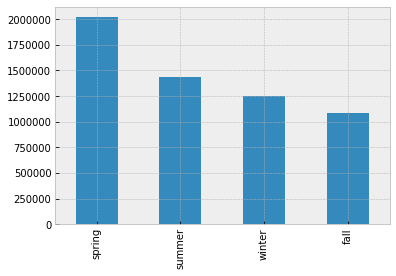

In [256]:
tmc_group['season'].value_counts().plot(kind='bar')

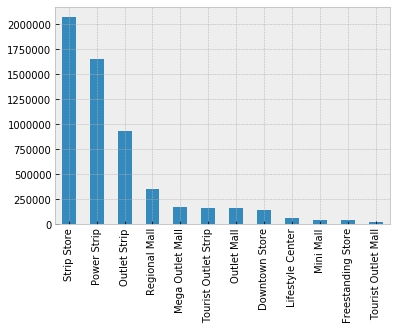

In [257]:
tmc_group['Store_Type'].value_counts().plot(kind='bar')

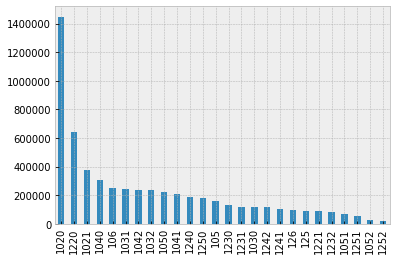

In [265]:
tmc_group['Dsubclass'].value_counts().plot(kind='bar')

- Plot b/w price and quantity before taking log

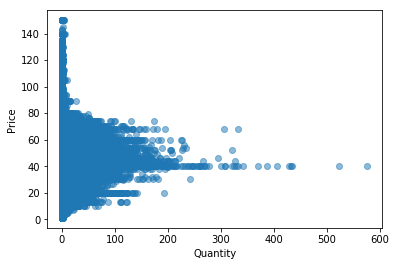

<Figure size 576x576 with 0 Axes>

In [20]:
x = tmc_maindata['Total_Units']
y = tmctarget
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

In [20]:
tmc_maindata['Total_Units'] = np.log(tmc_maindata['Total_Units'])

- Plot b/w price and quantity after taking log on Total_Units

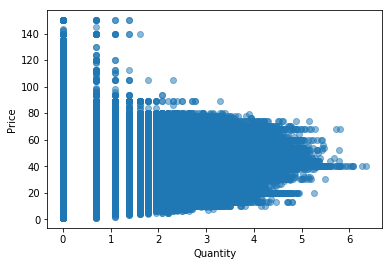

In [47]:
x = tmc_maindata['Total_Units']
y = tmctarget
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

###### Feature Selection using Random Forest which can give best features for modelling

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfm = RandomForestRegressor(random_state=212)

In [52]:
rfm.fit(tmc_maindata,tmctarget)

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=212, verbose=0, warm_start=False)

In [54]:
feature_list = []
for name, score in zip(tmc_maindata.columns, rfm.feature_importances_):
    feature_list.append((score, name))
sorted(feature_list, reverse=True)

[(0.3490524065512585, 'Full_Price_Ind'),
 (0.1733602618808175, 'season_spring'),
 (0.060488225894872405, 'Total_Units'),
 (0.04141440966201184, 'season_winter'),
 (0.022877136085139665, 'season_fall'),
 (0.022529592625453898, 'Dsubclass_1020'),
 (0.01965215319770742, 'Dsubclass_1050'),
 (0.015416544115779867, 'Dsubclass_1031'),
 (0.01386546911410855, 'Dsubclass_1240'),
 (0.013506678786778983, 'Dsubclass_1250'),
 (0.013230325069789384, 'Dsubclass_1051'),
 (0.011265281448004654, 'Dsubclass_1220'),
 (0.010474025875901119, 'Dsubclass_1052'),
 (0.010352712657954063, 'Dsubclass_1242'),
 (0.009629747012909006, 'Store_Type_Power Strip'),
 (0.009019696759915541, 'Store_Type_Strip Store'),
 (0.008690579250657226, 'Dsubclass_1042'),
 (0.008654085803447144, 'Dsubclass_105'),
 (0.007879878062467847, 'Dsubclass_1251'),
 (0.007425499482312461, 'Dsubclass_1241'),
 (0.0073604746811259305, 'Dsubclass_1021'),
 (0.007158660960680021, 'Dsubclass_125'),
 (0.00625092132326191, 'Dsubclass_106'),
 (0.005999794

Current size: [12.0, 15.0]


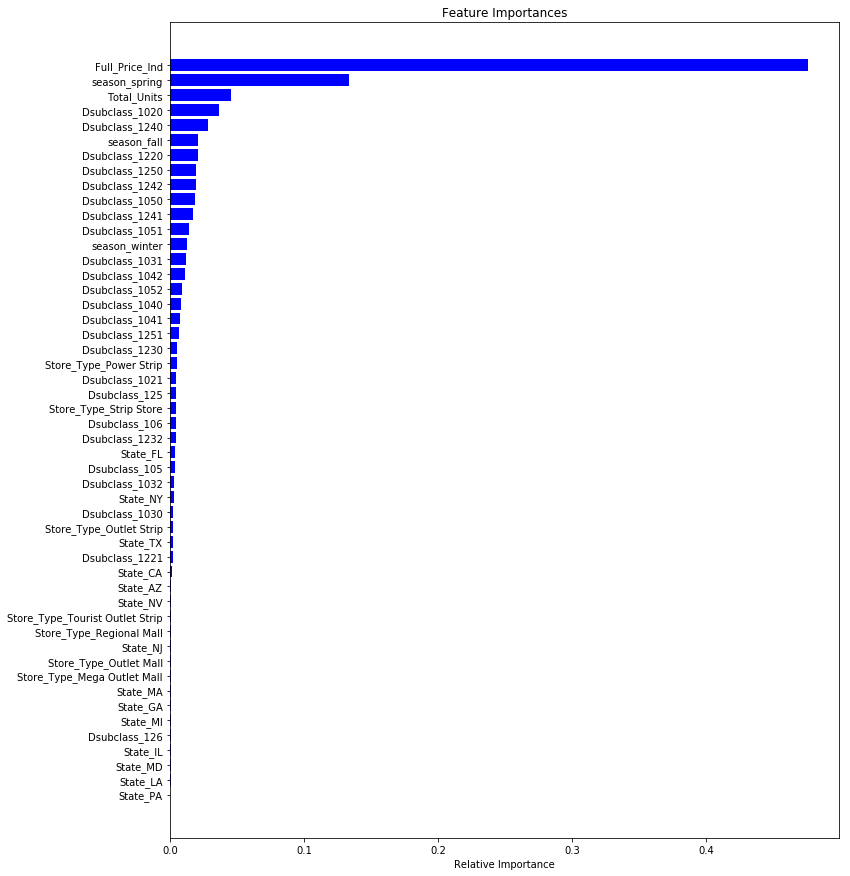

In [40]:
features = tmc_maindata.columns
importances = rfm.feature_importances_
indices = np.argsort(importances)[-50:]  # top 50 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center',)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

#### Considering top 43 features for modelling (half of the total features available)

In [24]:
tmc_sel_feat = tmc_maindata[['Full_Price_Ind','season_spring','Total_Units','season_winter','season_fall','Dsubclass_1020',
                             'Dsubclass_1050','Dsubclass_1031','Dsubclass_1240','Dsubclass_1250','Dsubclass_1051',
                             'Dsubclass_1220','Dsubclass_1052','Dsubclass_1242','Store_Type_Power Strip','Store_Type_Strip Store',
                             'Dsubclass_1042','Dsubclass_105','Dsubclass_1251','Dsubclass_1241','Dsubclass_1021','Dsubclass_125',
                             'Dsubclass_106','Store_Type_Outlet Strip','Dsubclass_1232','Dsubclass_1040','State_FL',
                             'Dsubclass_1230','Dsubclass_1032','State_NY','State_TX','Dsubclass_1041','Store_Type_Regional Mall',
                             'Dsubclass_1030','State_CA','Dsubclass_1231','State_NJ','State_IL','State_AZ',
                             'Store_Type_Outlet Mall','Store_Type_Tourist Outlet Strip','Dsubclass_1221',
                             'Store_Type_Mega Outlet Mall']]

- Correlation Between few Xs and target variable 'Unit_Sales_Price'

In [76]:
from scipy import stats
print(" For Full_Price_Ind vs y --->",stats.pointbiserialr(tmc_sel_feat['Full_Price_Ind'], tmctarget))
print(" For season_spring Store vs y --->",stats.pointbiserialr(tmc_sel_feat['season_spring'], tmctarget))
print(" For Total_Units vs y --->",stats.pointbiserialr(tmc_sel_feat['Total_Units'], tmctarget))
print(" For Dsubclass_1020 vs y --->",stats.pointbiserialr(tmc_sel_feat['Dsubclass_1020'], tmctarget))
print(" For Dsubclass_1240 vs y --->",stats.pointbiserialr(tmc_sel_feat['Dsubclass_1240'], tmctarget))
print(" For season_fall vs y --->",stats.pointbiserialr(tmc_sel_feat['season_fall'], tmctarget))
print(" For Dsubclass_1220 vs y --->",stats.pointbiserialr(tmc_sel_feat['Dsubclass_1220'], tmctarget))
print(" For Dsubclass_1250 vs y --->",stats.pointbiserialr(tmc_sel_feat['Dsubclass_1250'], tmctarget))
print(" For Dsubclass_1242 vs y --->",stats.pointbiserialr(tmc_sel_feat['Dsubclass_1242'], tmctarget))

 For Full_Price_Ind vs y ---> PointbiserialrResult(correlation=0.3758545261974288, pvalue=0.0)
 For season_spring Store vs y ---> PointbiserialrResult(correlation=0.1778353176009048, pvalue=0.0)
 For Total_Units vs y ---> PointbiserialrResult(correlation=0.1525076474855098, pvalue=0.0)
 For Dsubclass_1020 vs y ---> PointbiserialrResult(correlation=-0.07259542123516532, pvalue=0.0)
 For Dsubclass_1240 vs y ---> PointbiserialrResult(correlation=0.09059493245296203, pvalue=0.0)
 For season_fall vs y ---> PointbiserialrResult(correlation=-0.017122754906459866, pvalue=0.0)
 For Dsubclass_1220 vs y ---> PointbiserialrResult(correlation=0.06955495869745268, pvalue=0.0)
 For Dsubclass_1250 vs y ---> PointbiserialrResult(correlation=-0.034719112650028854, pvalue=0.0)
 For Dsubclass_1242 vs y ---> PointbiserialrResult(correlation=0.07460301422223498, pvalue=0.0)


#### Splitting the Dataset and training the dataset using OLS, Linear, Ridge, Lasso Regressions

In [87]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat, tmctarget, test_size = 0.3,\
                                                    random_state=212)

In [33]:
X_train = sm.add_constant(X_train)
lm_1 = sm.OLS(Y_train, X_train).fit()
lm_1.summary()

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Unit_Sales_Price   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                 2.994e+04
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        03:16:27   Log-Likelihood:            -1.5666e+07
No. Observations:             4056522   AIC:                         3.133e+07
Df Residuals:                 4056478   BIC:                         3.133e+07
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              29.9099      0.049    611.648      0.000      29.814      30.006
Full_Price_Ind                     14.4487      0.018    788.347      0.000      14.413      14.485
season_spring                       6.0665      0.015    402.881      0.000       6.037       6.096
Total_Units                         1.5074      0.008    178.886      0.000       1.491       1.524
season_winter                       1.1048      0.017     65.274      0.000       1.072       1.138
season_fall                         1.9838      0.018    112.454      0.000       1.949       2.018
Dsubclass_1020                     -1.2973      0.042    -30.781      0.000      -1.380      -1.215
Dsubclass_1050                     -4.4604      0.050    -89.077      0.000      -4.559      -4.362
Dsubclass_1031                     -3.7040      0.049    -75.161      0.000      -3.801      -3.607
Dsubclass_1240                      7.1406      0.052    138.225      0.000       7.039       7.242
Dsubclass_1250                     -1.7898      0.052    -34.460      0.000      -1.892      -1.688
Dsubclass_1051                     -6.8016      0.067   -101.295      0.000      -6.933      -6.670
Dsubclass_1220                      3.1436      0.044     71.373      0.000       3.057       3.230
Dsubclass_1052                    -10.9207      0.096   -113.723      0.000     -11.109     -10.733
Dsubclass_1242                      7.1262      0.057    124.079      0.000       7.014       7.239
Store_Type_Power Strip             -1.4994      0.028    -53.933      0.000      -1.554      -1.445
Store_Type_Strip Store             -1.5045      0.027    -55.349      0.000      -1.558      -1.451
Dsubclass_1042                      3.7027      0.049     74.918      0.000       3.606       3.800
Dsubclass_105                      -1.6072      0.053    -30.235      0.000      -1.711      -1.503
Dsubclass_1251                     -3.7857      0.073    -52.068      0.000      -3.928      -3.643
Dsubclass_1241                      6.4813      0.059    110.304      0.000       6.366       6.596
Dsubclass_1021                     -1.4518      0.046    -31.348      0.000      -1.543      -1.361
Dsubclass_125                       2.5017      0.062     40.569      0.000       2.381       2.623
Dsubclass_106                      -2.1309      0.049    -43.386      0.000      -2.227      -2.035
Store_Type_Outlet Strip            -0.4690      0.029    -15.952      0.000      -0.527      -0.411
Dsubclass_1232                      3.5104      0.063     55.627      0.000       3.387       3.634
Dsubclass_1040                      3.0117      0.048     63.252      0.000       2.918       3.105
State_FL                            0.0959      0.028      3.475      0.001       0

In [244]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge Regression with Low Alpha', Ridge(alpha=0.01)))
models.append(('Ridge Regression with High Alpha', Ridge(alpha=100)))
models.append(('Lasso Regression', Lasso()))
models.append(('Lasso Regression with low Aplha', Lasso(alpha=0.01, max_iter=10e5)))
models.append(('Lasso Regression with Lower Alpha', Lasso(alpha=0.0001, max_iter=10e5)))

In [245]:
for name, model in models:
    print("-- Applying -->",name)
    rgn = model
    rgn.fit(X_train,Y_train)
    r2 = r2_score(Y_test,rgn.predict(X_test))
    print("Train Score - ",rgn.score(X_train, Y_train))
    print("Test Score - ",rgn.score(X_test, Y_test))
    print("R-Squared - ",r2)
    print("No. of features used:", np.sum(rgn.coef_!=0))

-- Applying --> Linear Regression
Train Score -  0.24089980323193017
Test Score -  0.24202176330819994
R-Squared -  0.2420217633081999
No. of features used: 43
-- Applying --> Ridge Regression with Low Alpha
Train Score -  0.2408998032319275
Test Score -  0.24202176322567762
R-Squared -  0.2420217632256776
No. of features used: 43
-- Applying --> Ridge Regression with High Alpha
Train Score -  0.24089963161500882
Test Score -  0.24202076790676916
R-Squared -  0.24202076790676919
No. of features used: 43
-- Applying --> Lasso Regression
Train Score -  0.095124487643654
Test Score -  0.09541983441350432
R-Squared -  0.09541983441350432
No. of features used: 3
-- Applying --> Lasso Regression with low Aplha
Train Score -  0.24000429986173985
Test Score -  0.2410554437002657
R-Squared -  0.24105544370026566
No. of features used: 39
-- Applying --> Lasso Regression with Lower Alpha
Train Score -  0.24089971280588196
Test Score -  0.24202092297999378
R-Squared -  0.24202092297999378
No. of f

#### Finding out the reason for such very low accuracy of 23% by analysing the distribution of data w.r.to "Total_Units"

In [238]:
tmc_group['Total_Units'].max()

575

In [49]:
tmc_group[tmc_group['Total_Units']==1].shape

(3812127, 8)

In [50]:
tmc_group[tmc_group['Total_Units']!=1].shape

(1982905, 8)

#### Finding out no. of transactions group by 'Total_Units'

In [58]:
tmc_units = tmc_group[tmc_group['Total_Units']>1]

In [59]:
tmc_units.shape

(1982905, 8)

In [60]:
tmc_units = tmc_units.groupby(['Total_Units'])['Dbsku'].count().reset_index()
tmc_units.rename(columns={'Dbsku':'Transactions count'},inplace=True)

In [217]:
tmc_units.tail(10)

,Total_Units,Transactions count
239,333,2
240,342,1
241,369,1
242,387,1
243,405,1
244,429,1
245,432,1
246,434,1
247,522,1
248,575,1


#### Almost 66% of the transactions have the Total_Units = 1, that means NO Variance in the Total_Units column which will obviously affect the model accuracy
#### Also, the majority of the data is distributed Total_Units = [1 to 5], due to this, the accuracy of the model is being at 23%. Therefore, considering only the transactions with Total_Units > 5 and try to rebuild the model

In [258]:
tmc_maindata2 = tmc_group[tmc_group['Total_Units']>5]

In [259]:
tmc_maindata2.head()

,Dbsku,Dsubclass,Store_Type,Unit_Sales_Price,State,season,Full_Price_Ind,Total_Units
575,159137,1051,Downtown Store,28.0,NY,fall,0,10
577,159137,1051,Downtown Store,28.0,NY,summer,0,7
592,159137,1051,Downtown Store,30.0,NY,fall,0,28
593,159137,1051,Downtown Store,30.0,NY,spring,0,9
594,159137,1051,Downtown Store,30.0,NY,summer,0,15


In [68]:
tmc_maindata2.shape

(401528, 8)

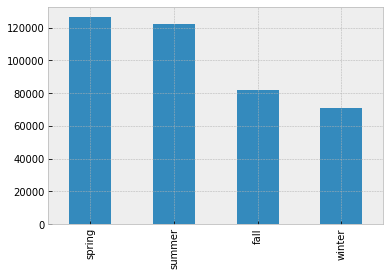

In [261]:
tmc_maindata2['season'].value_counts().plot(kind='bar')

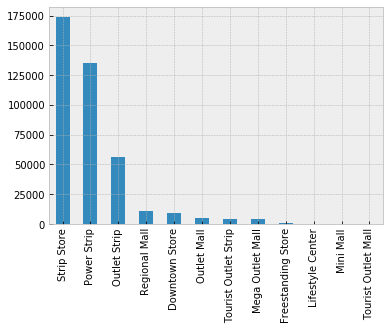

In [262]:
tmc_maindata2['Store_Type'].value_counts().plot(kind='bar')

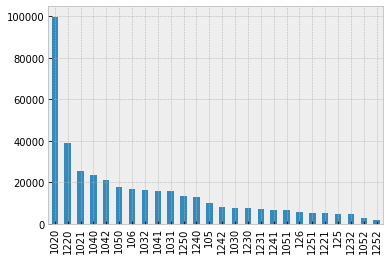

In [264]:
tmc_maindata2['Dsubclass'].value_counts().plot(kind='bar')

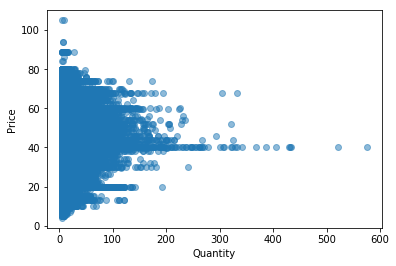

In [71]:
x = tmc_maindata2['Total_Units']
y = tmc_maindata2['Unit_Sales_Price']
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

In [69]:
tmc_maindata2.head()

,Dbsku,Dsubclass,Store_Type,Unit_Sales_Price,State,season,Full_Price_Ind,Total_Units
575,159137,1051,Downtown Store,28.0,NY,fall,0,10
577,159137,1051,Downtown Store,28.0,NY,summer,0,7
592,159137,1051,Downtown Store,30.0,NY,fall,0,28
593,159137,1051,Downtown Store,30.0,NY,spring,0,9
594,159137,1051,Downtown Store,30.0,NY,summer,0,15


In [70]:
tmc_maindata2 = pd.get_dummies(tmc_maindata2, columns= ['Dsubclass', 'Store_Type', 'season', 'State'])
tmc_maindata2.drop(['Dsubclass_1252','Store_Type_Downtown Store','season_summer','State_ME'], axis=1, inplace=True)
tmctarget2 = tmc_maindata2['Unit_Sales_Price']
tmc_maindata2.drop(['Dbsku','Unit_Sales_Price'],axis=1,inplace=True)
tmc_maindata2['Total_Units'] = np.log(tmc_maindata2['Total_Units'])

#### Considering top 43 features (as per RandomForest Selection of Features) for modelling (half of the total features available)

#### Rebuilding the model

In [72]:
tmc_sel_feat2 = tmc_maindata2[['Full_Price_Ind','season_spring','Total_Units','season_winter','season_fall','Dsubclass_1020',
                             'Dsubclass_1050','Dsubclass_1031','Dsubclass_1240','Dsubclass_1250','Dsubclass_1051',
                             'Dsubclass_1220','Dsubclass_1052','Dsubclass_1242','Store_Type_Power Strip','Store_Type_Strip Store',
                             'Dsubclass_1042','Dsubclass_105','Dsubclass_1251','Dsubclass_1241','Dsubclass_1021','Dsubclass_125',
                             'Dsubclass_106','Store_Type_Outlet Strip','Dsubclass_1232','Dsubclass_1040','State_FL',
                             'Dsubclass_1230','Dsubclass_1032','State_NY','State_TX','Dsubclass_1041','Store_Type_Regional Mall',
                             'Dsubclass_1030','State_CA','Dsubclass_1231','State_NJ','State_IL','State_AZ',
                             'Store_Type_Outlet Mall','Store_Type_Tourist Outlet Strip','Dsubclass_1221',
                             'Store_Type_Mega Outlet Mall']]

- Correlation Between few Xs and target variable 'Unit_Sales_Price'

In [74]:
from scipy import stats
print(" For Full_Price_Ind vs y --->",stats.pointbiserialr(tmc_sel_feat2['Full_Price_Ind'], tmctarget2))
print(" For season_spring Store vs y --->",stats.pointbiserialr(tmc_sel_feat2['season_spring'], tmctarget2))
print(" For Total_Units vs y --->",stats.pointbiserialr(tmc_sel_feat2['Total_Units'], tmctarget2))
print(" For season_winter Store vs y --->",stats.pointbiserialr(tmc_sel_feat2['season_winter'], tmctarget2))
print(" For season_fall Store vs y --->",stats.pointbiserialr(tmc_sel_feat2['season_fall'], tmctarget2))
print(" For Dsubclass_1020 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1020'], tmctarget2))
print(" For Dsubclass_1050 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1050'], tmctarget2))
print(" For Dsubclass_1031 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1031'], tmctarget2))
print(" For Dsubclass_1250 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1250'], tmctarget2))
print(" For Dsubclass_1240 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1240'], tmctarget2))
print(" For Dsubclass_1051 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1051'], tmctarget2))
print(" For Dsubclass_1220 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1220'], tmctarget2))
print(" For Dsubclass_1052 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1052'], tmctarget2))
print(" For Dsubclass_1242 vs y --->",stats.pointbiserialr(tmc_sel_feat2['Dsubclass_1242'], tmctarget2))

 For Full_Price_Ind vs y ---> PointbiserialrResult(correlation=0.669631798949862, pvalue=0.0)
 For season_spring Store vs y ---> PointbiserialrResult(correlation=0.11927415279458892, pvalue=0.0)
 For Total_Units vs y ---> PointbiserialrResult(correlation=0.11583875521788593, pvalue=0.0)
 For season_winter Store vs y ---> PointbiserialrResult(correlation=-0.09158579227476274, pvalue=0.0)
 For season_fall Store vs y ---> PointbiserialrResult(correlation=0.1101005123412268, pvalue=0.0)
 For Dsubclass_1020 vs y ---> PointbiserialrResult(correlation=-0.06264053716997066, pvalue=0.0)
 For Dsubclass_1050 vs y ---> PointbiserialrResult(correlation=-0.06990328790370906, pvalue=0.0)
 For Dsubclass_1031 vs y ---> PointbiserialrResult(correlation=-0.09151802348992628, pvalue=0.0)
 For Dsubclass_1250 vs y ---> PointbiserialrResult(correlation=-0.014757991763814649, pvalue=8.595358669882618e-21)
 For Dsubclass_1240 vs y ---> PointbiserialrResult(correlation=0.1158851152329628, pvalue=0.0)
 For Dsubc

In [77]:
tmc_sel_feat2.shape

(401528, 43)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat2, tmctarget2, test_size = 0.3,\
                                                    random_state=212)

In [79]:
X_train.shape

(281069, 43)

In [80]:
X_train = sm.add_constant(X_train)
lm_2 = sm.OLS(Y_train, X_train).fit()
lm_2.summary()

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Unit_Sales_Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     8598.
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        04:07:33   Log-Likelihood:            -9.9482e+05
No. Observations:              281069   AIC:                         1.990e+06
Df Residuals:                  281025   BIC:                         1.990e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              28.0510      0.165    170.178      0.000      27.728      28.374
Full_Price_Ind                     17.7567      0.035    505.235      0.000      17.688      17.826
season_spring                       5.5171      0.040    137.030      0.000       5.438       5.596
Total_Units                         0.7572      0.030     25.113      0.000       0.698       0.816
season_winter                       1.0379      0.048     21.767      0.000       0.944       1.131
season_fall                         4.3778      0.046     95.153      0.000       4.288       4.468
Dsubclass_1020                      0.7627      0.117      6.504      0.000       0.533       0.993
Dsubclass_1050                     -3.4729      0.136    -25.548      0.000      -3.739      -3.206
Dsubclass_1031                     -1.5049      0.138    -10.892      0.000      -1.776      -1.234
Dsubclass_1240                      9.8075      0.144     68.292      0.000       9.526      10.089
Dsubclass_1250                      0.0986      0.143      0.691      0.490      -0.181       0.378
Dsubclass_1051                     -7.3738      0.168    -43.887      0.000      -7.703      -7.044
Dsubclass_1220                      5.8706      0.124     47.469      0.000       5.628       6.113
Dsubclass_1052                    -13.4794      0.223    -60.359      0.000     -13.917     -13.042
Dsubclass_1242                      9.6369      0.157     61.347      0.000       9.329       9.945
Store_Type_Power Strip             -0.8616      0.103     -8.362      0.000      -1.064      -0.660
Store_Type_Strip Store             -0.8814      0.102     -8.671      0.000      -1.081      -0.682
Dsubclass_1042                      5.1952      0.132     39.254      0.000       4.936       5.455
Dsubclass_105                       0.0148      0.151      0.098      0.922      -0.282       0.312
Dsubclass_1251                     -4.5649      0.179    -25.536      0.000      -4.915      -4.215
Dsubclass_1241                      8.0411      0.165     48.687      0.000       7.717       8.365
Dsubclass_1021                      0.6933      0.129      5.374      0.000       0.440       0.946
Dsubclass_125                       3.9980      0.182     21.966      0.000       3.641       4.355
Dsubclass_106                      -0.0916      0.137     -0.670      0.503      -0.360       0.176
Store_Type_Outlet Strip            -0.2987      0.108     -2.754      0.006      -0.511      -0.086
Dsubclass_1232                      7.0994      0.183     38.720      0.000       6.740       7.459
Dsubclass_1040                      3.9057      0.130     29.984      0.000       3.650       4.161
State_FL                           -0.7995      0.070    -11.400      0.000      -0

#### Rebuilding the Model by dropping the features with p-val > 0.05 from the above OLS summary

In [82]:
tmc_sel_feat2 = tmc_sel_feat2.drop(['Dsubclass_105','Dsubclass_106','State_NY','State_NJ','Store_Type_Outlet Mall',
                                   'Store_Type_Mega Outlet Mall','Dsubclass_1250'],axis=1)

In [83]:
tmc_sel_feat2.shape

(401528, 36)

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat2, tmctarget2, test_size = 0.3,\
                                                    random_state=212)

In [85]:
X_train = sm.add_constant(X_train)
lm_3 = sm.OLS(Y_train, X_train).fit()
lm_3.summary()

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Unit_Sales_Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                 1.027e+04
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        04:08:44   Log-Likelihood:            -9.9482e+05
No. Observations:              281069   AIC:                         1.990e+06
Df Residuals:                  281032   BIC:                         1.990e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              28.0061      0.106    264.756      0.000      27.799      28.213
Full_Price_Ind                     17.7558      0.035    511.590      0.000      17.688      17.824
season_spring                       5.5168      0.040    137.335      0.000       5.438       5.595
Total_Units                         0.7597      0.029     25.789      0.000       0.702       0.817
season_winter                       1.0422      0.048     21.921      0.000       0.949       1.135
season_fall                         4.3842      0.046     95.688      0.000       4.294       4.474
Dsubclass_1020                      0.7639      0.056     13.707      0.000       0.655       0.873
Dsubclass_1050                     -3.4730      0.088    -39.270      0.000      -3.646      -3.300
Dsubclass_1031                     -1.5022      0.092    -16.368      0.000      -1.682      -1.322
Dsubclass_1240                      9.8082      0.100     98.232      0.000       9.613      10.004
Dsubclass_1051                     -7.3739      0.133    -55.565      0.000      -7.634      -7.114
Dsubclass_1220                      5.8721      0.068     86.148      0.000       5.738       6.006
Dsubclass_1052                    -13.4795      0.198    -68.038      0.000     -13.868     -13.091
Dsubclass_1242                      9.6378      0.118     81.380      0.000       9.406       9.870
Store_Type_Power Strip             -0.8256      0.076    -10.893      0.000      -0.974      -0.677
Store_Type_Strip Store             -0.8485      0.074    -11.451      0.000      -0.994      -0.703
Dsubclass_1042                      5.1956      0.083     62.656      0.000       5.033       5.358
Dsubclass_1251                     -4.5661      0.146    -31.261      0.000      -4.852      -4.280
Dsubclass_1241                      8.0418      0.129     62.369      0.000       7.789       8.295
Dsubclass_1021                      0.6958      0.077      8.994      0.000       0.544       0.847
Dsubclass_125                       4.0016      0.150     26.709      0.000       3.708       4.295
Store_Type_Outlet Strip            -0.2615      0.081     -3.213      0.001      -0.421      -0.102
Dsubclass_1232                      7.1021      0.152     46.870      0.000       6.805       7.399
Dsubclass_1040                      3.9068      0.079     49.165      0.000       3.751       4.063
State_FL                           -0.8092      0.069    -11.740      0.000      -0.944      -0.674
Dsubclass_1230                      4.6708      0.124     37.795      0.000       4.429       4.913
Dsubclass_1032                      2.1182      0.090     23.497      0.000       1.942       2.295
State_TX                           -1.1048      0.058    -18.912      0.000      -1

#### Even by dropping the high p-val features, the model accuracy is still 56.8% and didn't improve, so modelling using Ridge and Lasso

In [88]:
from sklearn.linear_model import RidgeCV, LassoCV

#### We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [89]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat2, tmctarget2, test_size = 0.3,\
                                                    random_state=212)

In [91]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train,Y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 36)

#### We expect the coefficient estimates to be much smaller in terms of  l2 norm when a large value of alpha is used as compared to when a small value of alpha is used and is explained in the below plot

Text(0,0.5,'weights')

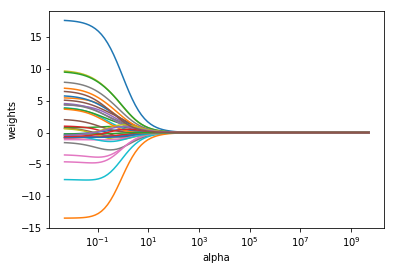

In [92]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### Now we fit a ridge regression model on the training set, and evaluate its score, MSE on the test set, using  λ=1 :

#### Instead of arbitrarily choosing alpha value, it would be better to use cross-validation to choose the tuning parameter alpha using the cross-validated ridge regression function, RidgeCV()

In [93]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.005

#### Therefore, we see that the value of alpha that results in the smallest cross-validation error is 0.005 and now we use this alpha value for ridge and find out the scores

In [94]:
ridge_after_cv = Ridge(alpha=ridgecv.alpha_,normalize = True)
ridge_after_cv.fit(X_train,Y_train)
ridge_after_cv_pred = ridge_after_cv.predict(X_test)
print("Ridge regression train score :",ridge_after_cv.score(X_train,Y_train))
print("Ridge regression test score :", ridge_after_cv.score(X_test, Y_test))
print("No. of features used:", np.sum(ridge_after_cv.coef_!=0))
print("R-Squared :",r2_score(Y_test, ridge_after_cv_pred))

Ridge regression train score : 0.5681079158872165
Ridge regression test score : 0.5661863283815038
No. of features used: 36
R-Squared : 0.5661863283815038


#### Coefficients of each independent variable after Ridge Regression with optimal alpha value are as below

In [96]:
print(pd.Series(ridge_after_cv.coef_, index = X_train.columns))

Full_Price_Ind                     17.663740
season_spring                       5.461719
Total_Units                         0.766647
season_winter                       1.003087
season_fall                         4.340101
Dsubclass_1020                      0.683280
Dsubclass_1050                     -3.526087
Dsubclass_1031                     -1.584513
Dsubclass_1240                      9.682406
Dsubclass_1051                     -7.402007
Dsubclass_1220                      5.765964
Dsubclass_1052                    -13.473988
Dsubclass_1242                      9.516946
Store_Type_Power Strip             -0.801117
Store_Type_Strip Store             -0.824084
Dsubclass_1042                      5.099128
Dsubclass_1251                     -4.606163
Dsubclass_1241                      7.923104
Dsubclass_1021                      0.604803
Dsubclass_125                       3.895240
Store_Type_Outlet Strip            -0.229000
Dsubclass_1232                      6.985947
Dsubclass_

#### Even with an ideal alpha we got from CV (0.05), the model score didn't improve where it is 56.6% which is lessthan OLS score (56.8%),  so trying the Lasso

Text(0,0.5,'weights')

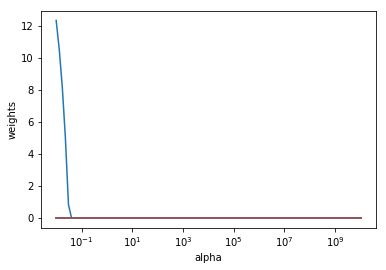

In [98]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### In the above graph also we can see that the coefficient estimates are approaching to zero as the alpha value increases

#### Trying with some a sequential increase in alphas for Lasso

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat2, tmctarget2, test_size = 0.3,\
                                                    random_state=212)

In [104]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [105]:
for alph in frange(0.001,0.010,0.001):
    lasso1 = Lasso(alpha=alph, max_iter=10e5)
    lasso1.fit(X_train,Y_train)
    print("Lasso regression train score :",alph,lasso1.score(X_train,Y_train))
    print("Lasso regression test score :",alph,lasso1.score(X_test, Y_test))
    print("No. of features used:",alph, np.sum(lasso1.coef_!=0))
    print("R-Squared :",r2_score(Y_test, lasso1.predict(X_test)))

Lasso regression train score : 0.001 0.56811397209987
Lasso regression test score : 0.001 0.566197656967665
No. of features used: 0.001 36
R-Squared : 0.566197656967665
Lasso regression train score : 0.002 0.5680659715421792
Lasso regression test score : 0.002 0.5661691355707501
No. of features used: 0.002 36
R-Squared : 0.5661691355707501
Lasso regression train score : 0.003 0.5679918087477057
Lasso regression test score : 0.003 0.5661114046843625
No. of features used: 0.003 35
R-Squared : 0.5661114046843625
Lasso regression train score : 0.004 0.5678990531561132
Lasso regression test score : 0.004 0.5660286775421857
No. of features used: 0.004 34
R-Squared : 0.5660286775421857
Lasso regression train score : 0.005 0.5677807390699838
Lasso regression test score : 0.005 0.565919292832566
No. of features used: 0.005 34
R-Squared : 0.565919292832566
Lasso regression train score : 0.006 0.5676488764320905
Lasso regression test score : 0.006 0.5658011684248698
No. of features used: 0.006 32

#### We can see that by the increase in alpha, the score decreases, now we perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [107]:
lasso1 = Lasso(alpha=0.00000009, max_iter=10e5)
lasso1.fit(X_train,Y_train)
print("Lasso regression train score :",lasso1.score(X_train,Y_train))
print("Lasso regression test score :", lasso1.score(X_test, Y_test))
print("No. of features used:", np.sum(lasso1.coef_!=0))
print("R-Squared :",r2_score(Y_test, lasso1.predict(X_test)))

Lasso regression train score : 0.5681299469310507
Lasso regression test score : 0.5661939305161114
No. of features used: 36
R-Squared : 0.5661939305161114


In [148]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

1.6026595927136046e-05

In [149]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
print("Lasso regression train score :",lasso.score(X_train,Y_train))
print("Lasso regression test score :",lasso.score(X_test, Y_test))
print("No. of features used:", np.sum(lasso.coef_!=0))
print("R-Squared :",r2_score(Y_test, lasso.predict(X_test)))

Lasso regression train score : 0.5680762928519865
Lasso regression test score : 0.5661916112786733
No. of features used: 35
R-Squared : 0.5661916112786733


In [150]:
print(pd.Series(lasso.coef_, index = X_train.columns))

Full_Price_Ind                     17.751174
season_spring                       5.462121
Total_Units                         0.732789
season_winter                       0.978534
season_fall                         4.327941
Dsubclass_1020                      0.612285
Dsubclass_1050                     -3.572872
Dsubclass_1031                     -1.606067
Dsubclass_1240                      9.613867
Dsubclass_1051                     -7.430810
Dsubclass_1220                      5.699559
Dsubclass_1052                    -13.510776
Dsubclass_1242                      9.436153
Store_Type_Power Strip             -0.567107
Store_Type_Strip Store             -0.581427
Dsubclass_1042                      5.025211
Dsubclass_1251                     -4.619347
Dsubclass_1241                      7.829846
Dsubclass_1021                      0.518584
Dsubclass_125                       3.767624
Store_Type_Outlet Strip            -0.000000
Dsubclass_1232                      6.873297
Dsubclass_

#### Here also even with an ideal alpha we got from CV (1.6026595927136046e-05), the model score didn't improve and the best score is still from OLS i.e., 56.8%

#### Manually eliminating each feature 1 by 1 and finding out the best accuracy at which point

In [151]:
tmc_sel_feat2.shape

(401528, 36)

In [38]:
tmc_sel_feat2.columns

Index(['Full_Price_Ind', 'season_spring', 'Total_Units', 'season_winter',
       'season_fall', 'Dsubclass_1020', 'Dsubclass_1050', 'Dsubclass_1031',
       'Dsubclass_1240', 'Dsubclass_1051', 'Dsubclass_1220', 'Dsubclass_1052',
       'Dsubclass_1242', 'Store_Type_Power Strip', 'Store_Type_Strip Store',
       'Dsubclass_1042', 'Dsubclass_1251', 'Dsubclass_1241', 'Dsubclass_1021',
       'Dsubclass_125', 'Store_Type_Outlet Strip', 'Dsubclass_1232',
       'Dsubclass_1040', 'State_FL', 'Dsubclass_1230', 'Dsubclass_1032',
       'State_TX', 'Dsubclass_1041', 'Store_Type_Regional Mall',
       'Dsubclass_1030', 'State_CA', 'Dsubclass_1231', 'State_IL', 'State_AZ',
       'Store_Type_Tourist Outlet Strip', 'Dsubclass_1221'],
      dtype='object')

In [152]:
tmc_sel_feat_temp = tmc_sel_feat2[['Full_Price_Ind', 'season_spring', 'Total_Units', 'season_winter',
       'season_fall', 'Dsubclass_1020', 'Dsubclass_1050', 'Dsubclass_1031']]

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat_temp, tmctarget2, test_size = 0.3,\
                                                    random_state=212)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
print("Lasso regression train score :",lasso.score(X_train,Y_train))
print("Lasso regression test score :",lasso.score(X_test, Y_test))
print("No. of features used:", np.sum(lasso.coef_!=0))
print("R-Squared :",r2_score(Y_test, lasso.predict(X_test)))

Lasso regression train score : 0.5030054507701633
Lasso regression test score : 0.5003171726264808
No. of features used: 8
R-Squared : 0.5003171726264808


#### When manually removed each feature 1 by 1 at no point the score has increased but has been decreasing from 56.6% to 50.03% gradually. 
#### So, trying now with DecisionTreeRegressor

In [154]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat2, tmctarget2, test_size = 0.3,\
                                                    random_state=212)

In [267]:
X_train.shape

(281069, 6)

In [156]:
tmc_tree = DecisionTreeRegressor(max_depth=18,max_features=36)
tmc_tree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=18, max_features=36,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [157]:
tmc_tree_pred = tmc_tree.predict(X_test)

In [158]:
r2_score(Y_test, tmc_tree_pred)

0.5865241479222593

#### By Simply giving some random hyper parameters of (max_depth=18,max_features=36) for DecisionTreeRegressor, the accuracy score is 58.6% which is slightly morethan all Regression models

#### Now finding out the best hyper parameters in order to get max accuracy from the model

In [159]:
for maxf in range(28,21,-1):
    for maxd in range(19,11,-1):
        tmc_tree = DecisionTreeRegressor(max_depth=maxd,max_features=maxf)
        tmc_tree.fit(X_train,Y_train)
        print("maxFeat, maxDepth, MAE, R-sqrd-->",maxf,maxd,mean_absolute_error(Y_test, tmc_tree.predict(X_test)),r2_score(Y_test, tmc_tree.predict(X_test)))

maxFeat, maxDepth, MAE, R-sqrd--> 28 19 6.295880295275003 0.5855847815648869
maxFeat, maxDepth, MAE, R-sqrd--> 28 18 6.304573999022466 0.5845524372684914
maxFeat, maxDepth, MAE, R-sqrd--> 28 17 6.30206330586554 0.5871047527180495
maxFeat, maxDepth, MAE, R-sqrd--> 28 16 6.327286165940921 0.585054880952484
maxFeat, maxDepth, MAE, R-sqrd--> 28 15 6.343630774958021 0.5843404860793544
maxFeat, maxDepth, MAE, R-sqrd--> 28 14 6.334571561954062 0.5850907217672773
maxFeat, maxDepth, MAE, R-sqrd--> 28 13 6.355923921561178 0.58120491275291
maxFeat, maxDepth, MAE, R-sqrd--> 28 12 6.384125810617241 0.5801544277383988
maxFeat, maxDepth, MAE, R-sqrd--> 27 19 6.302624276358134 0.5845326084271554
maxFeat, maxDepth, MAE, R-sqrd--> 27 18 6.303396011167763 0.5846918890361343
maxFeat, maxDepth, MAE, R-sqrd--> 27 17 6.329124444066875 0.584107110309172
maxFeat, maxDepth, MAE, R-sqrd--> 27 16 6.3216319544981525 0.5868037452816621
maxFeat, maxDepth, MAE, R-sqrd--> 27 15 6.3107405988192875 0.5862456901920672
ma

#### From the above DecisionTreeRegressor iterations, the below parameters gives the max R-Sqrd value

- maxFeat, maxDepth, MAE, R-sqrd--> 29 - 17-  6.303134084258644 - 0.5875827831382956

#### Therefore considering this as the maximum accuracy (58.75) achieved for the data with Total_Units >5. Now, proceeding with the next steps

#### Now considering the transactions with Total_Units > 10 and applying all the above models in the same way as above

In [268]:
tmc_maindata3 = tmc_group[tmc_group['Total_Units']>10]

In [161]:
tmc_maindata3.shape

(162872, 8)

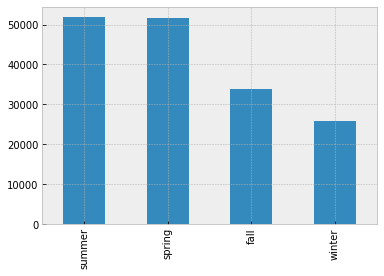

In [269]:
tmc_maindata3['season'].value_counts().plot(kind='bar')

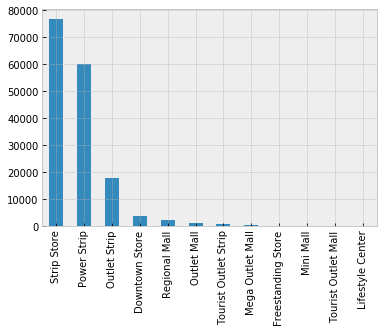

In [271]:
tmc_maindata3['Store_Type'].value_counts().plot(kind='bar')

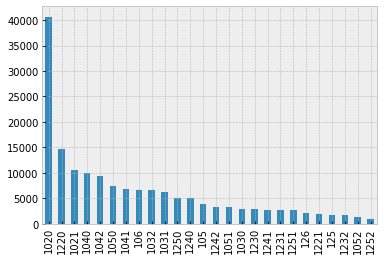

In [272]:
tmc_maindata3['Dsubclass'].value_counts().plot(kind='bar')

In [162]:
tmc_maindata3 = pd.get_dummies(tmc_maindata3, columns= ['Dsubclass', 'Store_Type', 'season', 'State'])
tmc_maindata3.drop(['Dsubclass_1252','Store_Type_Downtown Store','season_summer','State_ME'], axis=1, inplace=True)
tmctarget3 =tmc_maindata3['Unit_Sales_Price']
tmc_maindata3.drop(['Dbsku','Unit_Sales_Price'],axis=1,inplace=True)
tmc_maindata3['Total_Units'] = np.log(tmc_maindata3['Total_Units'])
tmc_maindata3.shape

(162872, 89)

In [163]:
tmc_sel_feat3= tmc_maindata3[['Full_Price_Ind','season_spring','Total_Units','season_winter','season_fall','Dsubclass_1020',
                             'Dsubclass_1050','Dsubclass_1031','Dsubclass_1240','Dsubclass_1250','Dsubclass_1051',
                             'Dsubclass_1220','Dsubclass_1052','Dsubclass_1242','Store_Type_Power Strip','Store_Type_Strip Store',
                             'Dsubclass_1042','Dsubclass_105','Dsubclass_1251','Dsubclass_1241','Dsubclass_1021','Dsubclass_125',
                             'Dsubclass_106','Store_Type_Outlet Strip','Dsubclass_1232','Dsubclass_1040','State_FL',
                             'Dsubclass_1230','Dsubclass_1032','State_NY','State_TX','Dsubclass_1041','Store_Type_Regional Mall',
                             'Dsubclass_1030','State_CA','Dsubclass_1231','State_NJ','State_IL','State_AZ',
                             'Store_Type_Outlet Mall','Store_Type_Tourist Outlet Strip','Dsubclass_1221',
                             'Store_Type_Mega Outlet Mall']]
tmc_sel_feat3 = tmc_sel_feat3.drop(['Dsubclass_105','Dsubclass_106','State_NY','State_NJ','Store_Type_Outlet Mall',
                                   'Store_Type_Mega Outlet Mall','Dsubclass_1250'],axis=1)

In [164]:
tmc_sel_feat3.shape,tmctarget3.shape

((162872, 36), (162872,))

- Plot b/w Price and Total_Units for this data

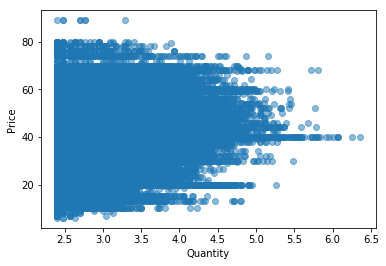

In [165]:
x = tmc_maindata3['Total_Units']
y = tmctarget3
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

#### OLS

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat3, tmctarget3, test_size = 0.3,\
                                                    random_state=212)
X_train = sm.add_constant(X_train)
lm_3 = sm.OLS(Y_train, X_train).fit()
lm_3.summary()

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Unit_Sales_Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     4743.
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        05:07:51   Log-Likelihood:            -3.9567e+05
No. Observations:              114010   AIC:                         7.914e+05
Df Residuals:                  113973   BIC:                         7.918e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              29.0768      0.202    144.108      0.000      28.681      29.472
Full_Price_Ind                     17.2563      0.049    349.039      0.000      17.159      17.353
season_spring                       5.5267      0.058     94.845      0.000       5.412       5.641
Total_Units                         0.3822      0.051      7.533      0.000       0.283       0.482
season_winter                       0.7417      0.072     10.301      0.000       0.601       0.883
season_fall                         4.5456      0.066     68.366      0.000       4.415       4.676
Dsubclass_1020                      0.8536      0.083     10.339      0.000       0.692       1.015
Dsubclass_1050                     -3.4820      0.129    -27.057      0.000      -3.734      -3.230
Dsubclass_1031                     -1.1974      0.136     -8.829      0.000      -1.463      -0.932
Dsubclass_1240                     10.0439      0.148     67.953      0.000       9.754      10.334
Dsubclass_1051                     -7.5424      0.179    -42.146      0.000      -7.893      -7.192
Dsubclass_1220                      6.2180      0.103     60.537      0.000       6.017       6.419
Dsubclass_1052                    -14.2331      0.277    -51.297      0.000     -14.777     -13.689
Dsubclass_1242                     10.0443      0.177     56.858      0.000       9.698      10.391
Store_Type_Power Strip             -0.6566      0.135     -4.879      0.000      -0.920      -0.393
Store_Type_Strip Store             -0.6447      0.132     -4.895      0.000      -0.903      -0.387
Dsubclass_1042                      5.2966      0.119     44.639      0.000       5.064       5.529
Dsubclass_1251                     -4.9100      0.196    -25.007      0.000      -5.295      -4.525
Dsubclass_1241                      8.3736      0.191     43.795      0.000       7.999       8.748
Dsubclass_1021                      0.7583      0.114      6.659      0.000       0.535       0.981
Dsubclass_125                       3.5721      0.237     15.059      0.000       3.107       4.037
Store_Type_Outlet Strip            -0.4284      0.145     -2.946      0.003      -0.713      -0.143
Dsubclass_1232                      7.5263      0.240     31.336      0.000       7.056       7.997
Dsubclass_1040                      3.7014      0.116     31.824      0.000       3.473       3.929
State_FL                           -0.6005      0.100     -6.030      0.000      -0.796      -0.405
Dsubclass_1230                      4.9064      0.190     25.868      0.000       4.535       5.278
Dsubclass_1032                      2.1770      0.133     16.314      0.000       1.915       2.439
State_TX                           -0.7373      0.080     -9.217      0.000      -0

#### Applying Ridge and Lasso on the same

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat3, tmctarget3, test_size = 0.3,\
                                                    random_state=212)

#### Instead of arbitrarily choosing alpha value, we use cross-validation to choose the tuning parameter alpha using the cross-validated ridge regression function, RidgeCV()

In [168]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.005

#### Therefore, we see that the value of alpha that results in the smallest cross-validation error is 0.005 and now we use this alpha value for ridge and find out the scores

In [169]:
ridge_after_cv = Ridge(alpha=ridgecv.alpha_,normalize = True)
ridge_after_cv.fit(X_train,Y_train)
ridge_after_cv_pred = ridge_after_cv.predict(X_test) 
print("Ridge regression train score :",ridge_after_cv.score(X_train,Y_train))
print("Ridge regression test score :", ridge_after_cv.score(X_test, Y_test))
print("No. of features used:", np.sum(ridge_after_cv.coef_!=0))
print("R-Squared :",r2_score(Y_test, ridge_after_cv_pred))

Ridge regression train score : 0.5996913010369436
Ridge regression test score : 0.5987017327024843
No. of features used: 36
R-Squared : 0.5987017327024843


#### Coefficients of each independent variable after Ridge Regression with optimal alpha value are as below

In [170]:
print(pd.Series(ridge_after_cv.coef_, index = X_train.columns))

Full_Price_Ind                     17.163431
season_spring                       5.469533
Total_Units                         0.393686
season_winter                       0.704848
season_fall                         4.502889
Dsubclass_1020                      0.769035
Dsubclass_1050                     -3.536031
Dsubclass_1031                     -1.285728
Dsubclass_1240                      9.912902
Dsubclass_1051                     -7.573916
Dsubclass_1220                      6.106715
Dsubclass_1052                    -14.224460
Dsubclass_1242                      9.918860
Store_Type_Power Strip             -0.620960
Store_Type_Strip Store             -0.610320
Dsubclass_1042                      5.195004
Dsubclass_1251                     -4.949756
Dsubclass_1241                      8.248426
Dsubclass_1021                      0.661031
Dsubclass_125                       3.464825
Store_Type_Outlet Strip            -0.377912
Dsubclass_1232                      7.405608
Dsubclass_

#### Even with an ideal alpha we got from CV (0.05), the model score didn't improve where it is 59.8% which is lessthan OLS score (60%),  so trying the Lasso

#### we perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:


In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat3, tmctarget3, test_size = 0.3,\
                                                    random_state=212)

In [172]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

2.479030415672104e-05

In [173]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
print("Lasso regression train score :",lasso.score(X_train,Y_train))
print("Lasso regression test score :",lasso.score(X_test, Y_test))
print("No. of features used:", np.sum(lasso.coef_!=0))
print("mean_squared_error:",r2_score(Y_test, lasso.predict(X_test)))

Lasso regression train score : 0.5996515988840994
Lasso regression test score : 0.5986246966520805
No. of features used: 36
mean_squared_error: 0.5986246966520805


#### Here the Lasso's accuracy is similar to Ridge's. So, proceeding with DTreeRegressor

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat3, tmctarget3, test_size = 0.3,\
                                                    random_state=212)

In [176]:
for maxf in range(36,18,-1):
    for maxd in range(22,7,-1):
        tmc_tree = DecisionTreeRegressor(max_depth=maxd,max_features=maxf)
        tmc_tree.fit(X_train,Y_train)
        print("maxFeat, maxDepth, MAE, R-sqrd-->",maxf,maxd,mean_absolute_error(Y_test, tmc_tree.predict(X_test)),r2_score(Y_test, tmc_tree.predict(X_test)))

maxFeat, maxDepth, MAE, R-sqrd--> 36 22 5.969768922472298 0.5917161843981394
maxFeat, maxDepth, MAE, R-sqrd--> 36 21 5.946561331532156 0.5964361808662368
maxFeat, maxDepth, MAE, R-sqrd--> 36 20 5.92314964184726 0.6010417354949638
maxFeat, maxDepth, MAE, R-sqrd--> 36 19 5.9052035439083 0.6051908042261833
maxFeat, maxDepth, MAE, R-sqrd--> 36 18 5.886892372794368 0.6091985434190468
maxFeat, maxDepth, MAE, R-sqrd--> 36 17 5.909141845577445 0.6099267268701819
maxFeat, maxDepth, MAE, R-sqrd--> 36 16 5.91136966184951 0.6104518496999494
maxFeat, maxDepth, MAE, R-sqrd--> 36 15 5.92678637503219 0.6114128733972088
maxFeat, maxDepth, MAE, R-sqrd--> 36 14 5.919178802269583 0.6113220104754591
maxFeat, maxDepth, MAE, R-sqrd--> 36 13 5.919367152800781 0.6112714333662097
maxFeat, maxDepth, MAE, R-sqrd--> 36 12 5.939055326033399 0.6114811589395153
maxFeat, maxDepth, MAE, R-sqrd--> 36 11 5.962936767284938 0.6096817701374263
maxFeat, maxDepth, MAE, R-sqrd--> 36 10 6.0217817542864704 0.605563917641182
maxF

maxFeat, maxDepth, MAE, R-sqrd--> 29 20 5.915826429618573 0.6033027103593162
maxFeat, maxDepth, MAE, R-sqrd--> 29 19 5.9131841925261295 0.6037597730498157
maxFeat, maxDepth, MAE, R-sqrd--> 29 18 5.885803286499271 0.6081162673522251
maxFeat, maxDepth, MAE, R-sqrd--> 29 17 5.912847418752458 0.6094807740323278
maxFeat, maxDepth, MAE, R-sqrd--> 29 16 5.921126735359107 0.6082743451903226
maxFeat, maxDepth, MAE, R-sqrd--> 29 15 5.906244864882414 0.6130170094567438
maxFeat, maxDepth, MAE, R-sqrd--> 29 14 5.928220362640437 0.610862219250267
maxFeat, maxDepth, MAE, R-sqrd--> 29 13 5.949332615560397 0.6109482682404426
maxFeat, maxDepth, MAE, R-sqrd--> 29 12 5.937929157884912 0.6129772402233267
maxFeat, maxDepth, MAE, R-sqrd--> 29 11 5.9888549250168195 0.6085483101961782
maxFeat, maxDepth, MAE, R-sqrd--> 29 10 6.018818506282036 0.6044601233344654
maxFeat, maxDepth, MAE, R-sqrd--> 29 9 6.076495461886254 0.599845781694401
maxFeat, maxDepth, MAE, R-sqrd--> 29 8 6.200763994165575 0.5926530390957974
m

maxFeat, maxDepth, MAE, R-sqrd--> 22 18 5.915044192487196 0.6050491397721511
maxFeat, maxDepth, MAE, R-sqrd--> 22 17 5.893584302256443 0.6094575484937788
maxFeat, maxDepth, MAE, R-sqrd--> 22 16 5.890890188201781 0.6118217000937857
maxFeat, maxDepth, MAE, R-sqrd--> 22 15 5.934445396478521 0.6100621763463152
maxFeat, maxDepth, MAE, R-sqrd--> 22 14 5.9579179859466915 0.6100457213492614
maxFeat, maxDepth, MAE, R-sqrd--> 22 13 5.921507985711371 0.6114794873289127
maxFeat, maxDepth, MAE, R-sqrd--> 22 12 5.986383274349301 0.6114267588565372
maxFeat, maxDepth, MAE, R-sqrd--> 22 11 6.013572260445367 0.6047323750476667
maxFeat, maxDepth, MAE, R-sqrd--> 22 10 6.0917700510427375 0.5991379389176601
maxFeat, maxDepth, MAE, R-sqrd--> 22 9 6.063443163242377 0.6028304174155295
maxFeat, maxDepth, MAE, R-sqrd--> 22 8 6.188317896904246 0.5925916551577856
maxFeat, maxDepth, MAE, R-sqrd--> 21 22 5.985078108640183 0.5894525280659355
maxFeat, maxDepth, MAE, R-sqrd--> 21 21 5.951427709728367 0.5962424960637903

#### From the above DecisionTreeRegressor iterations, the below parameters gives the max R-Sqrd value

- maxFeat, maxDepth, MAE, R-sqrd--> 31 - 13 - 5.910253182229491 - 0.6136663521705759

#### Building Model using RandomForests

In [178]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat3, tmctarget3, test_size = 0.3,\
                                                    random_state=212)
rfmodel= RandomForestRegressor(random_state=212)
rfmodel.fit(X_train, Y_train)

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=212, verbose=0, warm_start=False)

In [179]:
print("Train Score - ",rfmodel.score(X_train,Y_train))
print("Test Score - ",rfmodel.score(X_test,Y_test))
print("R-Squared - ",r2_score(Y_test, rfmodel.predict(X_test)))

Train Score -  0.7249715704901663
Test Score -  0.5818863365813265
R-Squared -  0.5818863365813265


In [ ]:
#### Below are the feature importances 

#### Even the RandomForests have given an R-Sqrd value of 58.1, where 61.3% being the top accuracy given by DTree at maxFeat(31) , maxDepth(13)

In [184]:
feature_list = []
for name, score in zip(X_train.columns, tmc_tree.feature_importances_):
    feature_list.append((score, name))
sorted(feature_list, reverse=True)

[(0.7602543363836287, 'Full_Price_Ind'),
 (0.080275784079801, 'season_spring'),
 (0.030379556908536408, 'season_fall'),
 (0.020918626103016043, 'Dsubclass_1240'),
 (0.02060075200193499, 'Dsubclass_1052'),
 (0.01953131077327303, 'Dsubclass_1051'),
 (0.01731828690898765, 'Dsubclass_1220'),
 (0.012798848104174422, 'Dsubclass_1242'),
 (0.01133123163179506, 'Dsubclass_1050'),
 (0.006907722775233379, 'Dsubclass_1241'),
 (0.00487428591488801, 'Dsubclass_1020'),
 (0.004516761008801341, 'Dsubclass_1251'),
 (0.002250048987656001, 'Dsubclass_1021'),
 (0.0019866182615334584, 'Dsubclass_1042'),
 (0.0017773733166798556, 'Dsubclass_1031'),
 (0.0012954909354730552, 'Total_Units'),
 (0.0010118209733550247, 'Dsubclass_1231'),
 (0.0008351408503076907, 'season_winter'),
 (0.00031948136606699983, 'Store_Type_Outlet Strip'),
 (0.00029117798492618764, 'Store_Type_Power Strip'),
 (0.00012183331229004096, 'State_CA'),
 (0.00011419677784699792, 'State_IL'),
 (9.915814947925322e-05, 'State_TX'),
 (9.182908268248

#### Trying to apply RandomForestRegressor for different no. of estimators in order to findout whether the accuracy increases or not

In [208]:
rfmodel2 = RandomForestRegressor(n_jobs=-1)

In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat3, tmctarget3, test_size = 0.3,\
                                                    random_state=212)

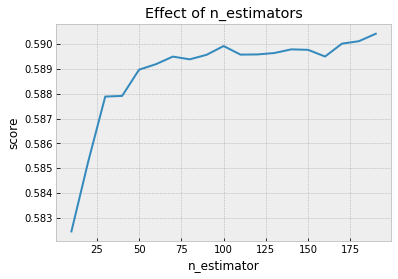

In [210]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfmodel2.set_params(n_estimators=n)
    rfmodel2.fit(X_train, Y_train)
    scores.append(rfmodel2.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [211]:
sorted(scores, reverse=True)

[0.5904179009168324,
 0.5901165978824382,
 0.5900182220763723,
 0.5899228218632745,
 0.5897880674720398,
 0.5897690459183562,
 0.5896404450535084,
 0.5895836768308368,
 0.5895761527841661,
 0.5895701978071484,
 0.5894999929115443,
 0.5894967000424969,
 0.5893866497683925,
 0.5891912292106812,
 0.5889689666259104,
 0.5879114090833059,
 0.5878845930814072,
 0.5852812045888267,
 0.5824493663802275]

#### The maximum test set score achieved by trying the Random forest with 10 - 190 estimators is only 59% but where as by DTree we can get upto 61.3%

#### Now considering the transactions with Total_Units > 20 and applying all the above models in the same way as above

In [273]:
tmc_maindata4 = tmc_group[tmc_group['Total_Units']>20]
tmc_maindata4.shape

(52916, 8)

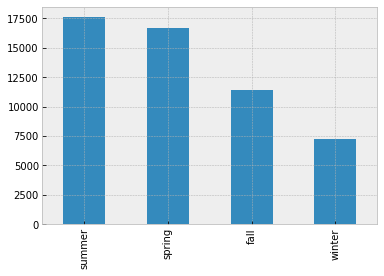

In [274]:
tmc_maindata4['season'].value_counts().plot(kind='bar')

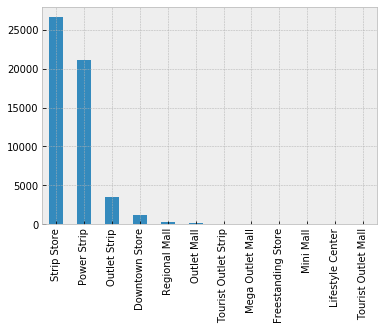

In [275]:
tmc_maindata4['Store_Type'].value_counts().plot(kind='bar')

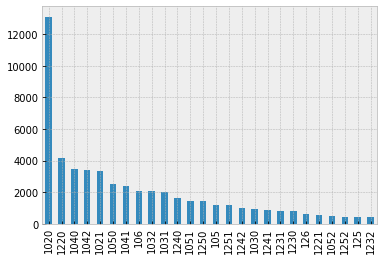

In [277]:
tmc_maindata4['Dsubclass'].value_counts().plot(kind='bar')

In [279]:
pp.ProfileReport(tmc_maindata4).to_file(outputfile="./tmc_maindata4.html")

In [188]:
tmc_maindata4 = pd.get_dummies(tmc_maindata4, columns= ['Dsubclass', 'Store_Type', 'season', 'State'])
tmc_maindata4.drop(['Dsubclass_1252','Store_Type_Downtown Store','season_summer','State_ME'], axis=1, inplace=True)
tmctarget4 =tmc_maindata4['Unit_Sales_Price']
tmc_maindata4.drop(['Dbsku','Unit_Sales_Price'],axis=1,inplace=True)
tmc_maindata4['Total_Units'] = np.log(tmc_maindata4['Total_Units'])
tmc_maindata4.shape

(52916, 89)

In [189]:
tmc_sel_feat4= tmc_maindata4[['Full_Price_Ind','season_spring','Total_Units','season_winter','season_fall','Dsubclass_1020',
                             'Dsubclass_1050','Dsubclass_1031','Dsubclass_1240','Dsubclass_1250','Dsubclass_1051',
                             'Dsubclass_1220','Dsubclass_1052','Dsubclass_1242','Store_Type_Power Strip','Store_Type_Strip Store',
                             'Dsubclass_1042','Dsubclass_105','Dsubclass_1251','Dsubclass_1241','Dsubclass_1021','Dsubclass_125',
                             'Dsubclass_106','Store_Type_Outlet Strip','Dsubclass_1232','Dsubclass_1040','State_FL',
                             'Dsubclass_1230','Dsubclass_1032','State_NY','State_TX','Dsubclass_1041','Store_Type_Regional Mall',
                             'Dsubclass_1030','State_CA','Dsubclass_1231','State_NJ','State_IL','State_AZ',
                             'Store_Type_Outlet Mall','Store_Type_Tourist Outlet Strip','Dsubclass_1221',
                             'Store_Type_Mega Outlet Mall']]
tmc_sel_feat4 = tmc_sel_feat4.drop(['Dsubclass_105','Dsubclass_106','State_NY','State_NJ','Store_Type_Outlet Mall',
                                   'Store_Type_Mega Outlet Mall','Dsubclass_1250','State_IL'],axis=1)

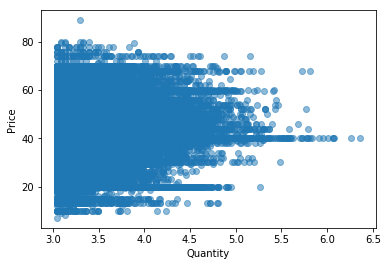

In [190]:
x = tmc_maindata4['Total_Units']
y = tmctarget4
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

#### OLS

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat4, tmctarget4, test_size = 0.3,\
                                                    random_state=212)
X_train = sm.add_constant(X_train)
lm_4 = sm.OLS(Y_train, X_train).fit()
lm_4.summary()

C:\Users\ajayi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Unit_Sales_Price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1708.
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        05:37:06   Log-Likelihood:            -1.2656e+05
No. Observations:               37041   AIC:                         2.532e+05
Df Residuals:                   37005   BIC:                         2.535e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              30.7223      0.430     71.448      0.000      29.879      31.565
Full_Price_Ind                     16.7884      0.082    205.689      0.000      16.628      16.948
season_spring                       5.4512      0.097     56.369      0.000       5.262       5.641
Total_Units                        -0.1522      0.102     -1.491      0.136      -0.352       0.048
season_winter                       0.2022      0.125      1.616      0.106      -0.043       0.447
season_fall                         4.2465      0.109     39.026      0.000       4.033       4.460
Dsubclass_1020                      1.4903      0.139     10.709      0.000       1.218       1.763
Dsubclass_1050                     -3.4881      0.213    -16.389      0.000      -3.905      -3.071
Dsubclass_1031                     -0.7749      0.229     -3.389      0.001      -1.223      -0.327
Dsubclass_1240                     10.6023      0.245     43.190      0.000      10.121      11.083
Dsubclass_1051                     -7.1156      0.265    -26.848      0.000      -7.635      -6.596
Dsubclass_1220                      7.0601      0.179     39.368      0.000       6.709       7.412
Dsubclass_1052                    -14.8094      0.434    -34.104      0.000     -15.661     -13.958
Dsubclass_1242                     11.5816      0.305     38.024      0.000      10.985      12.179
Store_Type_Power Strip             -0.5339      0.253     -2.111      0.035      -1.029      -0.038
Store_Type_Strip Store             -0.5567      0.247     -2.258      0.024      -1.040      -0.073
Dsubclass_1042                      6.1084      0.191     31.996      0.000       5.734       6.483
Dsubclass_1251                     -4.4788      0.290    -15.433      0.000      -5.048      -3.910
Dsubclass_1241                      8.8455      0.320     27.637      0.000       8.218       9.473
Dsubclass_1021                      1.4895      0.191      7.815      0.000       1.116       1.863
Dsubclass_125                       2.7395      0.440      6.227      0.000       1.877       3.602
Store_Type_Outlet Strip            -0.7320      0.286     -2.559      0.010      -1.293      -0.171
Dsubclass_1232                      8.5676      0.454     18.892      0.000       7.679       9.456
Dsubclass_1040                      3.6180      0.189     19.107      0.000       3.247       3.989
State_FL                           -0.4542      0.166     -2.743      0.006      -0.779      -0.130
Dsubclass_1230                      5.4188      0.331     16.356      0.000       4.769       6.068
Dsubclass_1032                      2.5848      0.226     11.439      0.000       2.142       3.028
State_TX                           -0.2971      0.123     -2.408      0.016      -0

#### DTreeRegressor

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat4, tmctarget4, test_size = 0.3,\
                                                    random_state=212)

In [193]:
for maxf in range(35,18,-1):
    for maxd in range(22,7,-1):
        tmc_tree = DecisionTreeRegressor(max_depth=maxd,max_features=maxf)
        tmc_tree.fit(X_train,Y_train)
        print("maxFeat, maxDepth, R-sqrd-->",maxf,maxd,r2_score(Y_test, tmc_tree.predict(X_test)))

maxFeat, maxDepth, R-sqrd--> 35 22 0.5596632521552644
maxFeat, maxDepth, R-sqrd--> 35 21 0.5687951634284789
maxFeat, maxDepth, R-sqrd--> 35 20 0.5775155450054518
maxFeat, maxDepth, R-sqrd--> 35 19 0.583202936649716
maxFeat, maxDepth, R-sqrd--> 35 18 0.5938172925419181
maxFeat, maxDepth, R-sqrd--> 35 17 0.5972800086353487
maxFeat, maxDepth, R-sqrd--> 35 16 0.6054041278035027
maxFeat, maxDepth, R-sqrd--> 35 15 0.6088434349062382
maxFeat, maxDepth, R-sqrd--> 35 14 0.6139326855318811
maxFeat, maxDepth, R-sqrd--> 35 13 0.6166057582734777
maxFeat, maxDepth, R-sqrd--> 35 12 0.6172500239391704
maxFeat, maxDepth, R-sqrd--> 35 11 0.6179929410886303
maxFeat, maxDepth, R-sqrd--> 35 10 0.6168708845912125
maxFeat, maxDepth, R-sqrd--> 35 9 0.6139879299614318
maxFeat, maxDepth, R-sqrd--> 35 8 0.6101187533345217
maxFeat, maxDepth, R-sqrd--> 34 22 0.5596388143708444
maxFeat, maxDepth, R-sqrd--> 34 21 0.5705238295533585
maxFeat, maxDepth, R-sqrd--> 34 20 0.5758328323929515
maxFeat, maxDepth, R-sqrd--> 34

maxFeat, maxDepth, R-sqrd--> 25 19 0.5840504035688211
maxFeat, maxDepth, R-sqrd--> 25 18 0.5956881579566606
maxFeat, maxDepth, R-sqrd--> 25 17 0.6035292064223651
maxFeat, maxDepth, R-sqrd--> 25 16 0.6049776413166712
maxFeat, maxDepth, R-sqrd--> 25 15 0.610447153456324
maxFeat, maxDepth, R-sqrd--> 25 14 0.6121236389219871
maxFeat, maxDepth, R-sqrd--> 25 13 0.6121635321705615
maxFeat, maxDepth, R-sqrd--> 25 12 0.6209954762724389
maxFeat, maxDepth, R-sqrd--> 25 11 0.6198025173030175
maxFeat, maxDepth, R-sqrd--> 25 10 0.6153357261855961
maxFeat, maxDepth, R-sqrd--> 25 9 0.6103128809362216
maxFeat, maxDepth, R-sqrd--> 25 8 0.6097981393945092
maxFeat, maxDepth, R-sqrd--> 24 22 0.5615837309380669
maxFeat, maxDepth, R-sqrd--> 24 21 0.5768558666155397
maxFeat, maxDepth, R-sqrd--> 24 20 0.5881110512122469
maxFeat, maxDepth, R-sqrd--> 24 19 0.5912627955796554
maxFeat, maxDepth, R-sqrd--> 24 18 0.5985996087554968
maxFeat, maxDepth, R-sqrd--> 24 17 0.5964282209081717
maxFeat, maxDepth, R-sqrd--> 24

#### From the above DecisionTreeRegressor iterations, the below parameters gives the max R-Sqrd value of 62.5%

- maxFeat, maxDepth, R-sqrd--> 20 -  12  - 0.6253643360147177

#### Modelling with randomised RandomForestRegressor

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(tmc_sel_feat4, tmctarget4, test_size = 0.3,\
                                                    random_state=212)

In [197]:
#Randomised search

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [196]:
tmc_sel_feat4.shape,tmctarget4.shape

((52916, 35), (52916,))

In [198]:
rf_random = RandomizedSearchCV(estimator = rfmodel, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=212, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [199]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

8.786582629447814 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
8.786582629447814 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
7.055178425125187 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
7.269459571853742 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
11.061564813202668 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
7.4345595780030775 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
7.142750693694418 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
7.232150417989564 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
10.95681853599202 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
7.204431416546596 {'n_estimators': 110, 'min_samples_spli

In [200]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=23,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=65, n_jobs=None,
           oob_score=False, random_state=212, verbose=0, warm_start=False)

In [201]:
rf_random.best_params_

{'n_estimators': 65,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 23}

In [202]:
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - Y_train)

mape = np.mean(100 * (errors / Y_train))
accuracy = 100 - mape    
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 86.52 %


In [203]:
final_mse = mean_squared_error(Y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 6.3


#### Feature Importance

In [204]:
importances = rf_random.best_estimator_.feature_importances_
X = tmc_sel_feat4
feature_list = list(X.columns)
feature_importance= sorted(zip(importances, feature_list), reverse=True)
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
print(df)

    importance                          feature
0     0.616246                   Full_Price_Ind
1     0.072474                      Total_Units
2     0.055480                    season_spring
3     0.025260                      season_fall
4     0.022662                   Dsubclass_1240
5     0.020089                   Dsubclass_1051
6     0.018680                   Dsubclass_1052
7     0.018159                   Dsubclass_1242
8     0.017738                   Dsubclass_1220
9     0.013095                   Dsubclass_1042
10    0.012033                    season_winter
11    0.011847                   Dsubclass_1050
12    0.009087                   Dsubclass_1020
13    0.008404                   Dsubclass_1241
14    0.008393                   Dsubclass_1251
15    0.008075                   Dsubclass_1031
16    0.006435                         State_TX
17    0.005675                   Dsubclass_1041
18    0.005237                         State_CA
19    0.004694          Store_Type_Outle

Text(0.5,1,'Variable Importances')

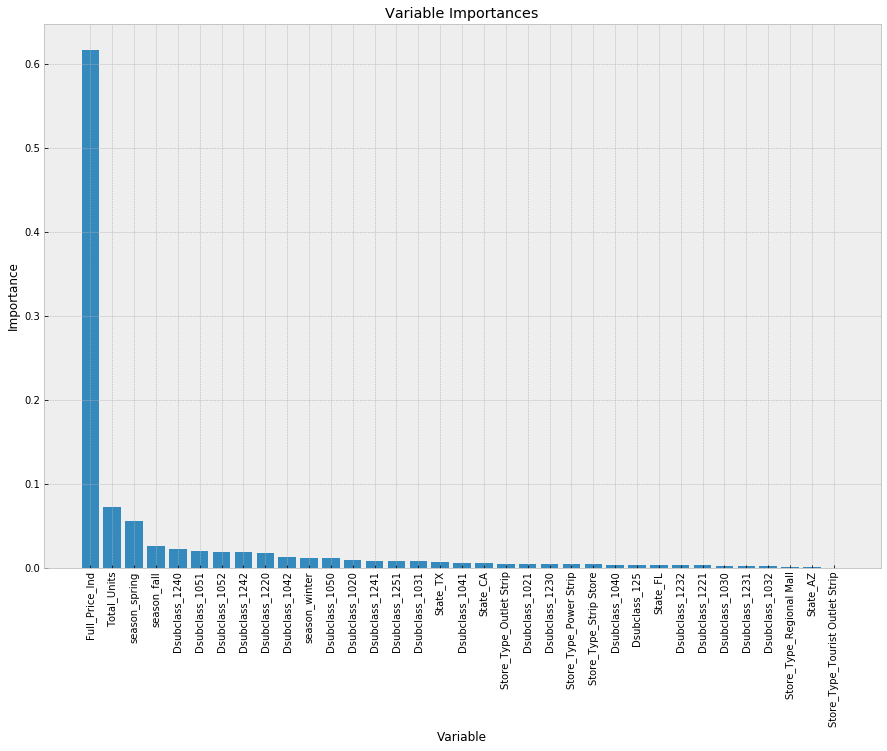

In [205]:
plt.style.use('bmh')
x_values = list(range(len(feature_importance)))
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [206]:
final_model = rf_random.best_estimator_
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(Y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 7.08


In [207]:
errors = abs(final_pred - Y_test)
mape = np.mean(100 * (errors / Y_test))
accuracy = 100 - mape    
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 85.07 %
